# This is the second part of my project where I have used the telecom churn dataset and tried to learn the distribution of the features using MCMC Bayesian Methods

## Determining posterior in a probablistic way:

## Background and intro: 

### Aim is to make inference about the mean using baysean mean and also figure out how much it varies. 

### For this we estimate the true mean and assume that the standard deviation is 1. 

### Now the Bayesian way to do this is given the data we determine the posterior. 
### Which is P(M|X) where M is the mean and X is the data. 

### suppose we say the prior is uniformly distributed and the mean is normally distributed

## the following steps are performed as part of a function on different features 

### Step 1: Create beliefs about the data, including the function and the prior likelihood function.

### Step 2: According to the data of our faith, the use of data and probability, updating our model, check our model is consistent with the original data.

### Step 3: The model update data view.

In [1]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import pandas as pd
from theano import shared

%matplotlib inline
%precision 4
plt.style.use('ggplot')

## Bayesian Inference related libraries:
import pymc3 as pm
from theano import shared
np.random.seed(1234)
import pymc3 as pm
import theano.tensor as tt
import pymc3 as pm
print(pm.__version__)

from matplotlib import animation, rc
%matplotlib inline
import scipy.stats as stats

import logging
_logger = logging.getLogger("theano.gof.compilelock")
_logger.setLevel(logging.ERROR)
# Any results you write to the current directory are saved as output.
# Standard machine learning models
from sklearn.linear_model import LogisticRegressionCV

# Scikit-learn utilities
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-darkgrid')
from IPython.core.pylabtools import figsize
import matplotlib.lines as mlines

import seaborn as sns
import itertools

pd.options.mode.chained_assignment = None


from warnings import filterwarnings
filterwarnings('ignore')

/Users/rabiyaowais/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


3.11.4


### Problem Statement 

### the problem for the MCMC has been formulated such that as per my prior knowledge and from data columns, I am perceiving that there are 3 main features that directly impact churn classification. 

### now using the MCMC chain, I will use bayesean inference to determine how well the mcmc model is able to learn the distribution of the feature. 

### the aim is to learn the distribution of the data based on the our prior knowledge

## MCMC MODELLING ON TELECOM DATA:

In [2]:
##Tel_Customer_Churn_Dataset.csv

churn_data = pd.read_csv('Tel_Customer_Churn_Dataset.csv')

In [28]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## viewing the dataset and the column values helps in understanding what the distribution may look like. ideadlly for my MCMC model, i want to use the variables that follow some what a guassian distribution. 

## further im seeing that my data overall has 21 features and around 7000 rows with no  missing values. 

## in the previous file where traditional ML models were being used, I had applied pandas profiling to determine the corelated columns along with various exporatory information. 

## here, i will pick the correlated columns as my features for the MCMC model in order to learn the distribution of the data so my modelling is generalized. 

In [3]:
print ("Rows     : " ,churn_data.shape[0])
print ("Columns  : " ,churn_data.shape[1])
print ("\nFeatures : \n" ,churn_data.columns.tolist())
print ("\nMissing values :  ", churn_data.isnull().sum().values.sum())
print ("\nUnique values :  \n",churn_data.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [5]:
for i in churn_data.columns:
    if len(churn_data[i].unique())<10:
        print("Column:{},Unique values:{}".format(i,churn_data[i].unique()))
    else:
        print("Column:{}Unique values:{}".format(i,len(churn_data[i].unique())))

Column:customerIDUnique values:7043
Column:gender,Unique values:['Female' 'Male']
Column:SeniorCitizen,Unique values:[0 1]
Column:Partner,Unique values:['Yes' 'No']
Column:Dependents,Unique values:['No' 'Yes']
Column:tenureUnique values:73
Column:PhoneService,Unique values:['No' 'Yes']
Column:MultipleLines,Unique values:['No phone service' 'No' 'Yes']
Column:InternetService,Unique values:['DSL' 'Fiber optic' 'No']
Column:OnlineSecurity,Unique values:['No' 'Yes' 'No internet service']
Column:OnlineBackup,Unique values:['Yes' 'No' 'No internet service']
Column:DeviceProtection,Unique values:['No' 'Yes' 'No internet service']
Column:TechSupport,Unique values:['No' 'Yes' 'No internet service']
Column:StreamingTV,Unique values:['No' 'Yes' 'No internet service']
Column:StreamingMovies,Unique values:['No' 'Yes' 'No internet service']
Column:Contract,Unique values:['Month-to-month' 'One year' 'Two year']
Column:PaperlessBilling,Unique values:['Yes' 'No']
Column:PaymentMethod,Unique values:['El

## now that the data has been viewed and explored, some basic wrangling has to be applied; as this is a classification problem, the aim is to model this as a binary result. therefore, the columns are standarized to map values as 0 and 1. 

##  below code section shows how the categorical and numerical variables are handled to be formulated for binary classification modelling and values to transition between 0 and 1. 

## the new data_frame is stored as telcom_dummies

In [6]:
telcom_dummies=pd.DataFrame()
print("Total number of rows before starting copying:{}".format(len(telcom_dummies)))
# len(telcom_dummies[telcom_dummies['TotalCharges'] == " "])
telcom_dummies = pd.get_dummies(churn_data[['gender','PaymentMethod','Contract']], columns=['gender','PaymentMethod','Contract'])
telcom_dummies['SeniorCitizen'] =churn_data['SeniorCitizen']
telcom_dummies['Partner'] = churn_data['Partner'].map(lambda s :1  if s =='Yes' else 0)
telcom_dummies['Dependents'] = churn_data['Dependents'].map(lambda s :1  if s =='Yes' else 0)
telcom_dummies['tenure']=churn_data['tenure']
telcom_dummies['PhoneService'] = churn_data['PhoneService'].map(lambda s :1  if s =='Yes' else 0)
telcom_dummies['MultipleLines'] = churn_data['MultipleLines'].map(lambda s :1  if s =='Yes' else 0)
telcom_dummies['Has_InternetService'] = churn_data['InternetService'].map(lambda s :0  if s =='No' else 1)
telcom_dummies['Fiber_optic'] = churn_data['InternetService'].map(lambda s :1  if s =='Fiber optic' else 0)
telcom_dummies['DSL'] = churn_data['InternetService'].map(lambda s :1  if s =='DSL' else 0)
telcom_dummies['OnlineSecurity'] = churn_data['OnlineSecurity'].map(lambda s :1  if s =='Yes' else 0)
telcom_dummies['OnlineBackup'] = churn_data['OnlineBackup'].map(lambda s :1  if s =='Yes' else 0)
telcom_dummies['DeviceProtection'] = churn_data['DeviceProtection'].map(lambda s :1  if s =='Yes' else 0)
telcom_dummies['TechSupport'] = churn_data['TechSupport'].map(lambda s :1  if s =='Yes' else 0)
telcom_dummies['StreamingTV'] = churn_data['StreamingTV'].map(lambda s :1  if s =='Yes' else 0)
telcom_dummies['StreamingMovies'] = churn_data['StreamingMovies'].map(lambda s :1  if s =='Yes' else 0)
telcom_dummies['PaperlessBilling'] = churn_data['PaperlessBilling'].map(lambda s :1  if s =='Yes' else 0)
telcom_dummies['MonthlyCharges']=churn_data['MonthlyCharges']
telcom_dummies['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'],errors='coerce')
print("Total number of rows after  copying:{}".format(len(telcom_dummies)))
      #Counting number of na
print("Number of NA")
print(len(telcom_dummies) - telcom_dummies.count())
telcom_dummies.dropna(axis=0,inplace=True)
print("Total number of rows after removing NA:{}".format(len(telcom_dummies)))
telcom_dummies['Churn']=churn_data['Churn'].map(lambda s :1  if s =='Yes' else 0)
telcom_dummies.rename(columns={"PaymentMethod_Bank transfer (automatic)" :"paymnt_mthd_bank_auto",
"PaymentMethod_Credit card (automatic)"  : "paymnt_mthd_cc_auto",
"PaymentMethod_Electronic check"   :"paymnt_mthd_elc_check",
"PaymentMethod_Mailed check"       :"paymnt_mthd_mailed_check",         
"Contract_Month-to-month":"cont_mnth_to_mnth",                    
"Contract_One year"  :"cont_1_yr",                       
"Contract_Two year"    :"cont_2_yr" },inplace=True)
telcom_dummies.columns

Total number of rows before starting copying:0
Total number of rows after  copying:7043
Number of NA
gender_Female                               0
gender_Male                                 0
PaymentMethod_Bank transfer (automatic)     0
PaymentMethod_Credit card (automatic)       0
PaymentMethod_Electronic check              0
PaymentMethod_Mailed check                  0
Contract_Month-to-month                     0
Contract_One year                           0
Contract_Two year                           0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
MultipleLines                               0
Has_InternetService                         0
Fiber_optic                                 0
DSL                                         0
OnlineSecurity                              0
OnlineBackup             

Index(['gender_Female', 'gender_Male', 'paymnt_mthd_bank_auto',
       'paymnt_mthd_cc_auto', 'paymnt_mthd_elc_check',
       'paymnt_mthd_mailed_check', 'cont_mnth_to_mnth', 'cont_1_yr',
       'cont_2_yr', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'Has_InternetService', 'Fiber_optic',
       'DSL', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
print("Checking if columns are ready to apply ML algorithm")
for i in telcom_dummies.columns:
    if len(telcom_dummies[i].unique())<10:
        print("Column:{},Unique values:{},Type:{}".format(i,telcom_dummies[i].unique(),telcom_dummies[i].dtypes))
    else:
        print("Column:{}Unique values:{},Type:{}".format(i,len(telcom_dummies[i].unique()),telcom_dummies[i].dtypes))

Checking if columns are ready to apply ML algorithm
Column:gender_Female,Unique values:[1 0],Type:uint8
Column:gender_Male,Unique values:[0 1],Type:uint8
Column:paymnt_mthd_bank_auto,Unique values:[0 1],Type:uint8
Column:paymnt_mthd_cc_auto,Unique values:[0 1],Type:uint8
Column:paymnt_mthd_elc_check,Unique values:[1 0],Type:uint8
Column:paymnt_mthd_mailed_check,Unique values:[0 1],Type:uint8
Column:cont_mnth_to_mnth,Unique values:[1 0],Type:uint8
Column:cont_1_yr,Unique values:[0 1],Type:uint8
Column:cont_2_yr,Unique values:[0 1],Type:uint8
Column:SeniorCitizen,Unique values:[0 1],Type:int64
Column:Partner,Unique values:[1 0],Type:int64
Column:Dependents,Unique values:[0 1],Type:int64
Column:tenureUnique values:72,Type:int64
Column:PhoneService,Unique values:[0 1],Type:int64
Column:MultipleLines,Unique values:[0 1],Type:int64
Column:Has_InternetService,Unique values:[1 0],Type:int64
Column:Fiber_optic,Unique values:[0 1],Type:int64
Column:DSL,Unique values:[1 0],Type:int64
Column:Onlin

## Next, the x and y are defined with X being the data , that is all columns except the label column, and y being the label column. the minmax scaler is applied to ensure all data is scaled between 0 and 1

In [9]:
y = telcom_dummies['Churn'].values
X = telcom_dummies.loc[:, telcom_dummies.columns != 'Churn']
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [10]:
# Calculate the accuracy and f1 score of a model
def calc_metrics(predictions, y_test):
    accuracy = np.mean(predictions == y_test)
    f1_metric = f1_score(y_test, predictions)

    print('Accuracy of Model: {:.2f}%'.format(100 * accuracy))
    print('F1 Score of Model: {:.4f}'.format(f1_metric))
baseline_pred = [0 for _ in range(len(y_test))]
calc_metrics(baseline_pred, y_test)

Accuracy of Model: 72.42%
F1 Score of Model: 0.0000


## to formulate the MCMC model problem, that given certain features, what is the probabilty of churn? below i have defined a logistric regression model, 


### While this may seem an algorithm for regression, logistic regression actually is a classification algorithm which estimates discrete values such as yes/no, 1/0 or true/false based on the provided independent variables. Similar to all regression analysis, the logistic regression also works as a predictive analysis algorithm. Though logistic regression, the probability of occurrence for an event is predicted by making the data fit to a function called logit. The logit function resembles a sigmoid function and outputs a value between 1 and 0 leading to classification. 


### For instance, given a test to solve, there’s some probability that a person can solve a particular test based on the domain that test belongs to and the knowledge a person has. To determine such a probability, the logistic regression algorithm will be used. The math behind this algorithm works such that the outcome is modelled as a linear combination of the predictor values. The log is taken for the outcome values in order to model them linearly under the probability p which indicates the presence of a characteristic of interest. The function then chooses a set of parameters which will maximise the likelihood of the sample values being observed. Hence, this differs from the regression method where the aim is to minimise the sum of squared errors. 

### To make a prediction for the class that a data may belong to, the decision boundary is used. The decision boundary is merely a threshold that is set in order to distribute the obtained estimated probability in to different classes. For instance, if the value predicted is >= 0.5, then the class of the data is true else its false. This boundary can be either non-linear or linear in simpler problems while it may have a higher polynomial order for complex problems. 

### For the logistic regression the cost function is different from the mean squared error that is typically used in the regression problems.

### This cost definition allows the function to become convex leading to a curve that can have a global minimum value. Thus, having such a cost function allows gradient descent to converge to a global minimum which is not possible in non-convex functions that are formed from mean squared error. 

### Furthermore, when making a selection for the logistic regression model, it is important to consider the model fitting. With the addition of independent variables to the model, there will be substantial increase in the amount of variance. Along with this, the increased variables will also cause overfitting which will reduce the models ability to generalise over unseen data. Hence, when performing logistic regression, overfitting may be a potential issue for which regularisation will have to be performed. 



In [14]:
lr = LogisticRegressionCV(Cs= 20, cv = 3, scoring = 'f1', 
                          penalty = 'l2', random_state = 42)
lr.fit(X_test, y_test)

# Make predictions and evaluate
lr_pred = lr.predict(X_test)
calc_metrics(lr_pred, y_test)

Accuracy of Model: 80.66%
F1 Score of Model: 0.6215


In [15]:
# Build up a formula
formula = [' %s + ' % variable for variable in X_test.columns]
formula.insert(0, 'y ~ ')
formula = ' '.join(''.join(formula).split(' ')[:-2])
formula

'y ~  gender_Female +  gender_Male +  paymnt_mthd_bank_auto +  paymnt_mthd_cc_auto +  paymnt_mthd_elc_check +  paymnt_mthd_mailed_check +  cont_mnth_to_mnth +  cont_1_yr +  cont_2_yr +  SeniorCitizen +  Partner +  Dependents +  tenure +  PhoneService +  MultipleLines +  Has_InternetService +  Fiber_optic +  DSL +  OnlineSecurity +  OnlineBackup +  DeviceProtection +  TechSupport +  StreamingTV +  StreamingMovies +  PaperlessBilling +  MonthlyCharges +  TotalCharges'

In [16]:
print('Intercept: {:0.4f}'.format(lr.intercept_[0]))
for feature, weight in zip(X_test.columns, lr.coef_[0]):
    print('Feature: {:30} Weight: {:0.4f}'.format(feature, weight))

Intercept: -0.6989
Feature: gender_Female                  Weight: 0.0707
Feature: gender_Male                    Weight: 0.0800
Feature: paymnt_mthd_bank_auto          Weight: -0.3088
Feature: paymnt_mthd_cc_auto            Weight: -0.0194
Feature: paymnt_mthd_elc_check          Weight: 0.3483
Feature: paymnt_mthd_mailed_check       Weight: 0.1306
Feature: cont_mnth_to_mnth              Weight: 0.7834
Feature: cont_1_yr                      Weight: 0.1424
Feature: cont_2_yr                      Weight: -0.7751
Feature: SeniorCitizen                  Weight: -0.2030
Feature: Partner                        Weight: -0.0768
Feature: Dependents                     Weight: -0.1505
Feature: tenure                         Weight: -4.0545
Feature: PhoneService                   Weight: -1.2949
Feature: MultipleLines                  Weight: 0.2668
Feature: Has_InternetService            Weight: 0.1055
Feature: Fiber_optic                    Weight: 0.2469
Feature: DSL                          

## for the MCMC modelling, I have used GLM:

## GLMs are basically generalized linear models which are very flexible and widely used to makes estimations of regression relationsships that exist between a single prediction variable versus one or more predictor variables. 

## the reason I selected the GLM model was because there are commonly used and with pymc3, these models are easy to customized with different sampling methods. 

## this helped me in analysing various versions of the model using different MCMC sampling techniques such as NUTs or Metropolis Hastings sampling. Also, using the GLM i was able to play around with the feature set being passed in the model as prior distribution and also tune the parameters such as number of tuning steps, chains, samples selected and draws made

## note that the main modelling family used in the GLM model is binomial. 
## this is because I have formulated this problem between 0 and 1 as discussed earlier as I want to achieve an outcome that is either true or false , hence the result will be binary.


In [17]:
X_with_labels = X_train.copy()
X_with_labels['y'] = y_train
with pm.Model() as logistic_model:
    priors=dict()
    
    for variable in X_test.columns:
        priors[variable]=pm.Uniform.dist(0,1)
    priors['Intercept']=pm.Normal.dist(mu=0., sigma=100.)
    priors['MonthlyCharges']=pm.Normal.dist(mu=0., sigma=100.)
    priors['TotalCharges'] = pm.Normal.dist(mu=0., sigma=100.)
    # Build the model using the formula and specify the data likelihood 
    pm.GLM.from_formula(formula, data = X_with_labels, family = pm.glm.families.Binomial(),priors=priors)
    
    # Using the no-uturn sampler
    sampler = pm.NUTS()
    
    # Sample from the posterior using NUTS
    trace_log = pm.sample(draws=2000, step = sampler, chains=1, tune=1000, random_seed=100,init='adapt_diag')

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Sequential sampling (1 chains in 1 job)
NUTS: [TotalCharges, MonthlyCharges, PaperlessBilling, StreamingMovies, StreamingTV, TechSupport, DeviceProtection, OnlineBackup, OnlineSecurity, DSL, Fiber_optic, Has_InternetService, MultipleLines, PhoneService, tenure, Dependents, Partner, SeniorCitizen, cont_2_yr, cont_1_yr, cont_mnth_to_mnth, paymnt_mthd_mailed_check, paymnt_mthd_elc_check, paymnt_mthd_cc_auto, paymnt_mthd_bank_auto, gender_Male, gender_Female, Intercept]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 72 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


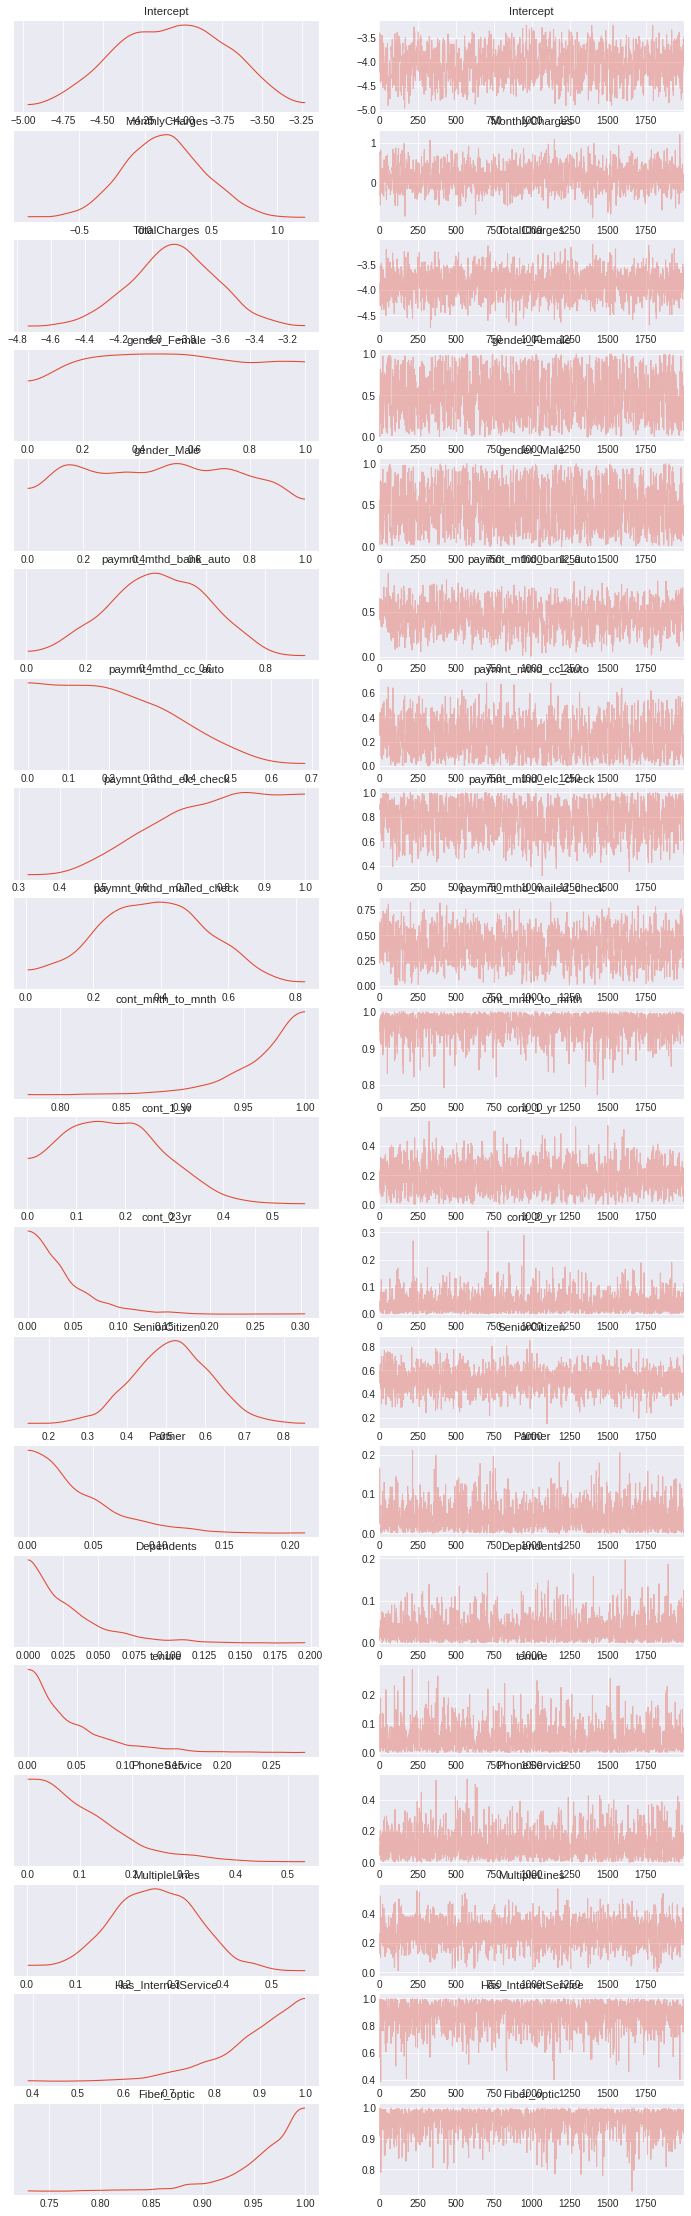

In [39]:
az.plot_trace(trace_log);

In [43]:
## Metropolis Hastings

X_with_labels = X_train.copy()
X_with_labels['y'] = y_train
with pm.Model() as logistic_model:
    priors=dict()
    
    for variable in X_test.columns:
        priors[variable]=pm.Uniform.dist(0,1)
    priors['Intercept']=pm.Normal.dist(mu=0., sigma=100.)
    priors['MonthlyCharges']=pm.Normal.dist(mu=0., sigma=150.)
    priors['TotalCharges'] = pm.Normal.dist(mu=0., sigma=100.)
    # Build the model using the formula and specify the data likelihood 
    pm.GLM.from_formula(formula, data = X_with_labels, family = pm.glm.families.Normal(),priors=priors)
    
    sampler = pm.Metropolis()
    # Using the no-uturn sampler
   # sampler = pm.NUTS()
    
    # Sample from the posterior using NUTS
    trace_log_MH = pm.sample(draws=2000, step = sampler, chains=1, tune=1000, random_seed=100,init='adapt_diag')

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [sd]
>Metropolis: [TotalCharges]
>Metropolis: [MonthlyCharges]
>Metropolis: [PaperlessBilling]
>Metropolis: [StreamingMovies]
>Metropolis: [StreamingTV]
>Metropolis: [TechSupport]
>Metropolis: [DeviceProtection]
>Metropolis: [OnlineBackup]
>Metropolis: [OnlineSecurity]
>Metropolis: [DSL]
>Metropolis: [Fiber_optic]
>Metropolis: [Has_InternetService]
>Metropolis: [MultipleLines]
>Metropolis: [PhoneService]
>Metropolis: [tenure]
>Metropolis: [Dependents]
>Metropolis: [Partner]
>Metropolis: [SeniorCitizen]
>Metropolis: [cont_2_yr]
>Metropolis: [cont_1_yr]
>Metropolis: [cont_mnth_to_mnth]
>Metropolis: [paymnt_mthd_mailed_check]
>Metropolis: [paymnt_mthd_elc_check]
>Metropolis: [paymnt_mthd_cc_auto]
>Metropolis: [paymnt_mthd_bank_auto]
>Metropolis: [gender_Male]
>Metropolis: [gender_Female]
>Metro

Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 35 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


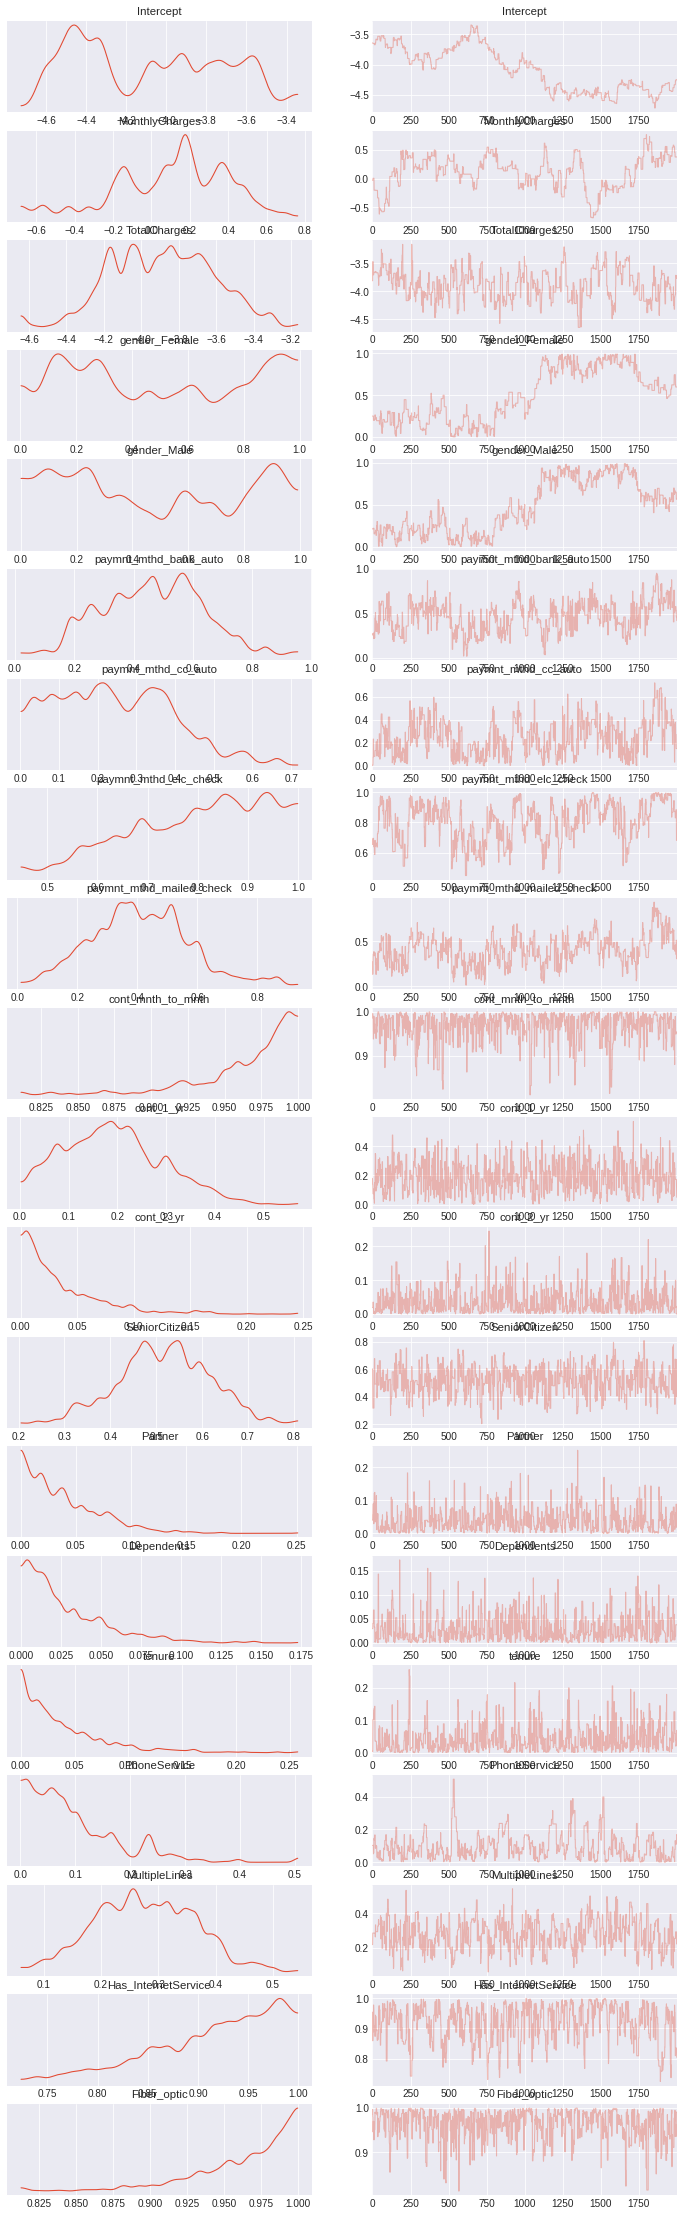

In [41]:
az.plot_trace(trace_log);

# Dealing with divergences: 

## A major issue that I had been facing in the beginning of my modelling was very high number of divergences: 

## the first model that i tried gave about 64 divergences with only 1 chain. Later after some experimentation on tuning parameters, the divergences dropped to 32 and then 14, 8 and then 6 , then finally, 0. 

## below I have compiled my learnings regarding the divergences and how they can be overcome:

### divergence occurs when the sampler finds regions of extremely high curvature. hence the sampler malfunctions in such regions and the values skew towards infinity. as a result, the chains become heavily biased. 

### to reduce the divergence, things to try out include increasing the acceptance rate, increasing tuning steps as the initial period is burn-in and the sampler starts to give valid result after some steps. 

In [42]:
import pickle
fileObject = open("all_parameters.pickle",'wb')  
pickle.dump(trace_log, fileObject)
fileObject.close()

In [43]:
trace_log_from_file= pickle.load(open("all_parameters.pickle",'rb')  )
#trace_log=trace_log_from_file   #Uncomment this line if we don't want to run model again

Got error No model on context stack. trying to find log_likelihood in translation.


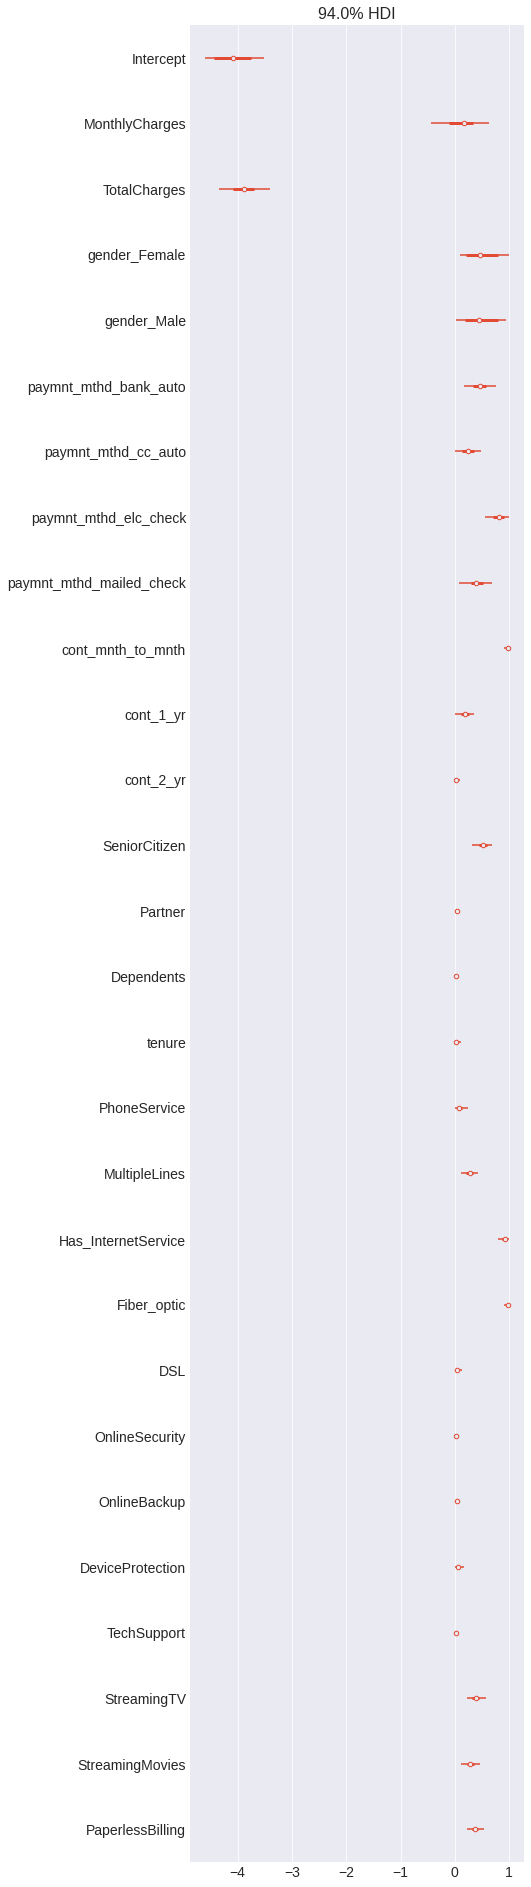

In [44]:
figsize(10, 12)
pm.forestplot(trace_log);

Got error No model on context stack. trying to find log_likelihood in translation.


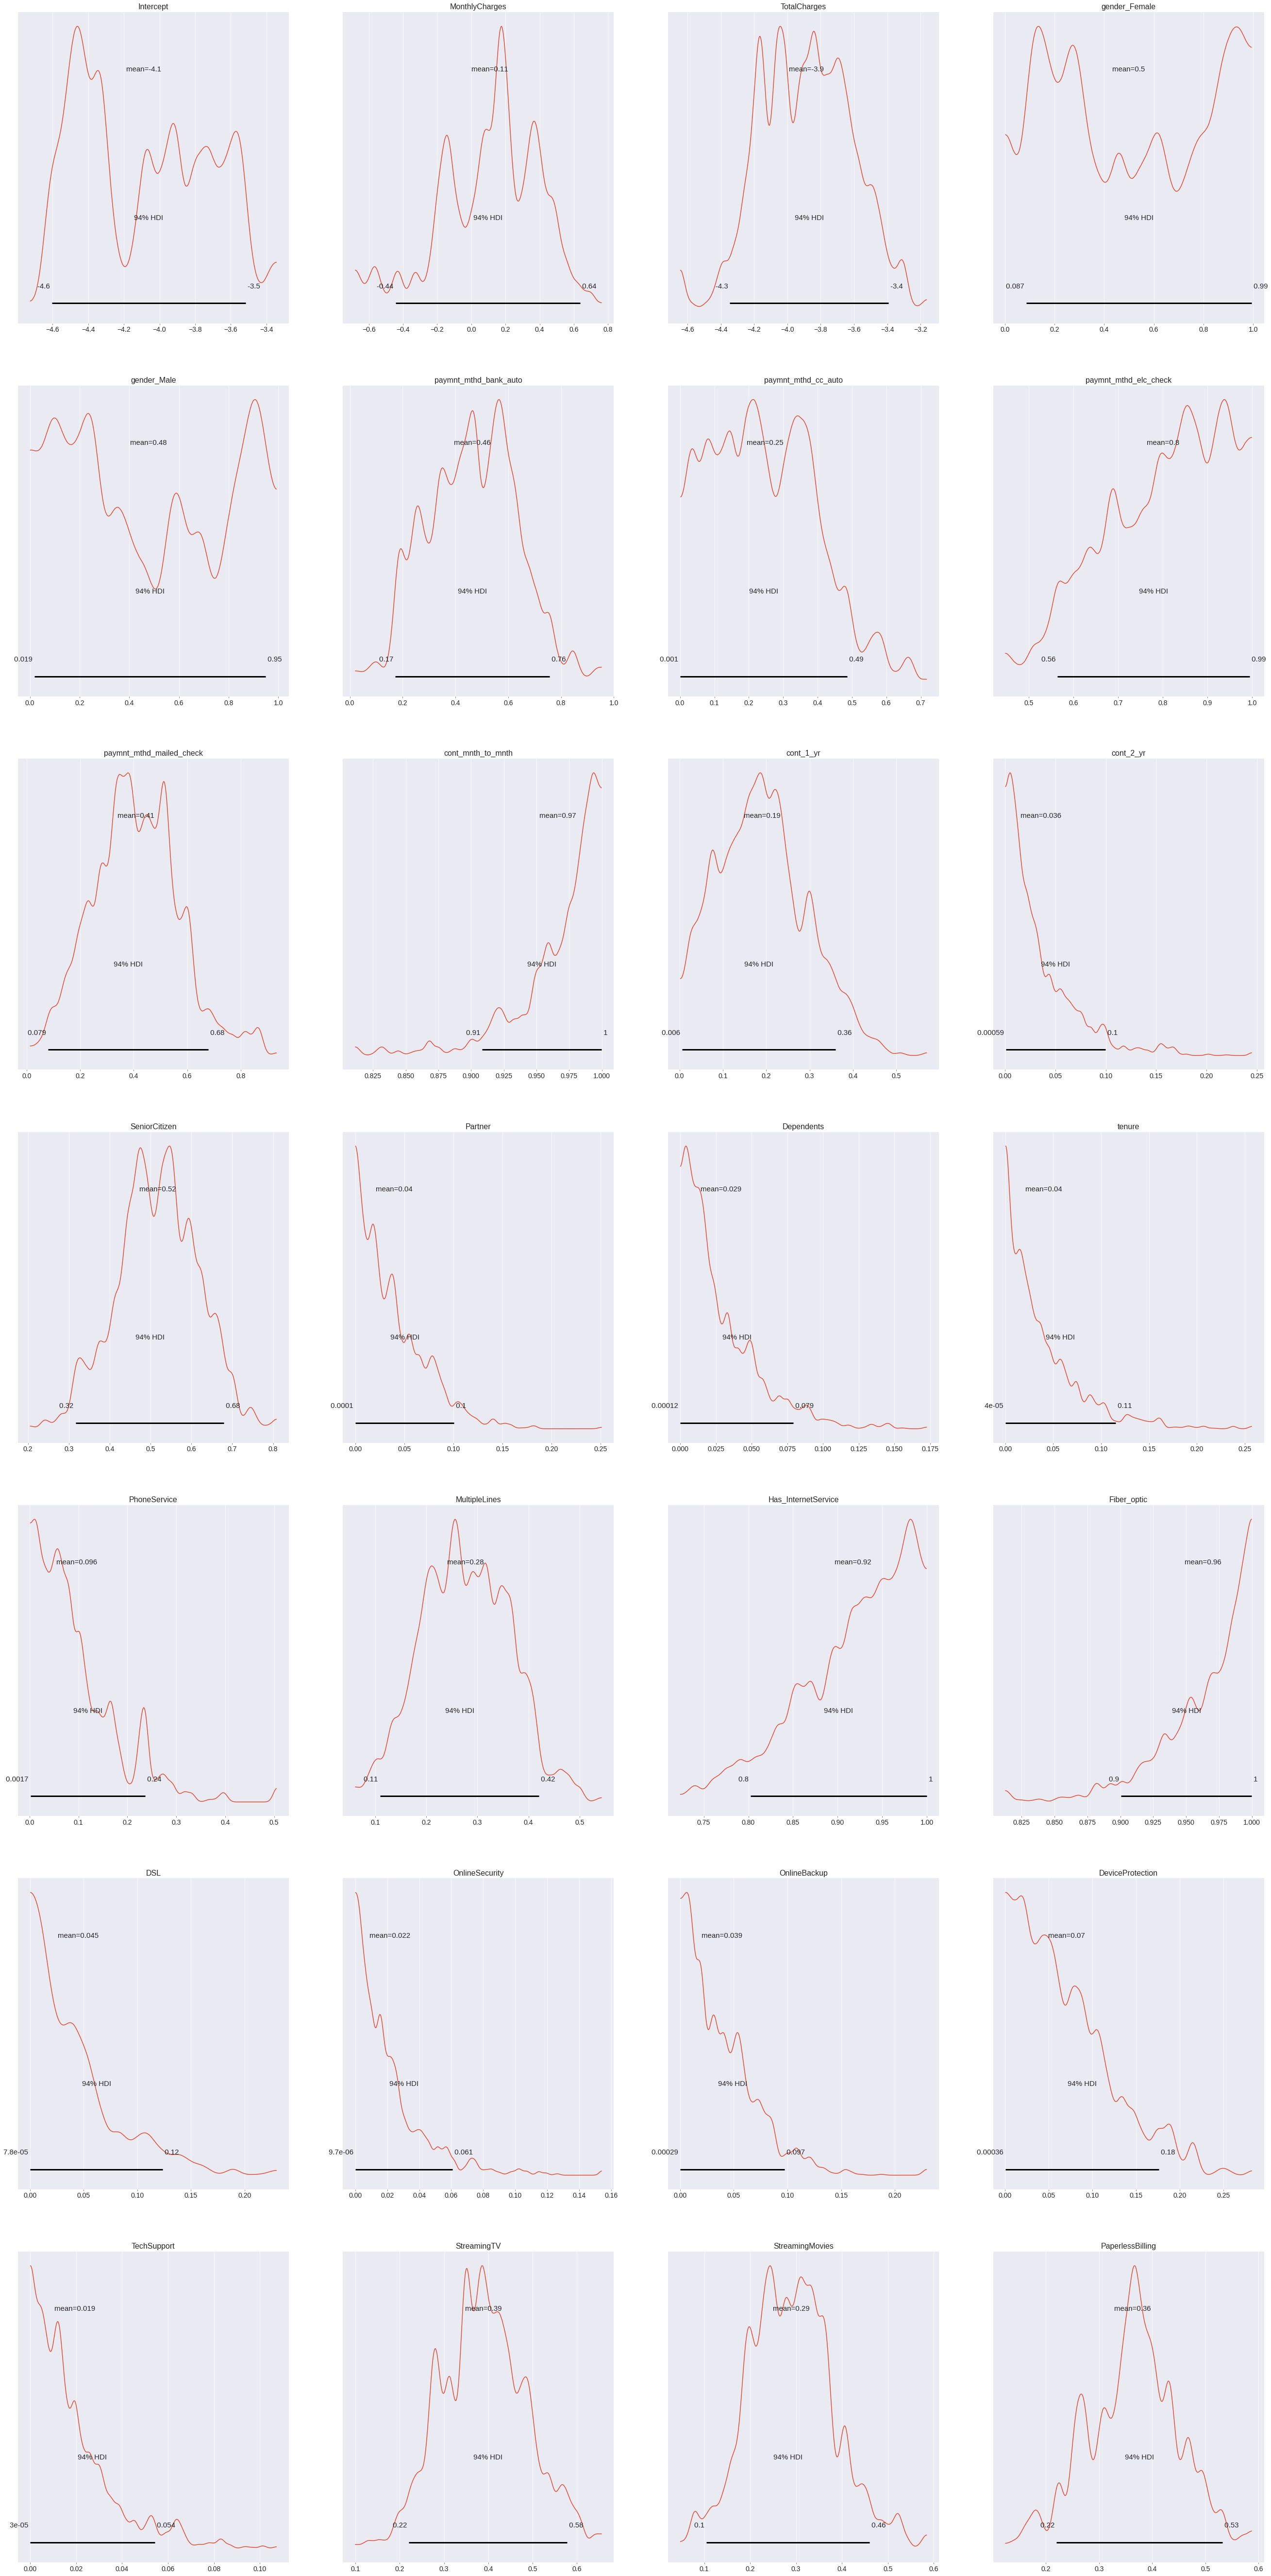

In [45]:
pm.plot_posterior(trace_log);

In [20]:
## using more chains

X_with_labels = X_train.copy()
X_with_labels['y'] = y_train
with pm.Model() as logistic_model_1:
    priors=dict()
    
    for variable in X_test.columns:
        priors[variable]=pm.Uniform.dist(0,1)
    priors['Intercept']=pm.Normal.dist(mu=0., sigma=100.)
    priors['MonthlyCharges']=pm.Normal.dist(mu=0., sigma=100.)
    #priors['TotalCharges'] = pm.Normal.dist(mu=0., sigma=100.)
    # Build the model using the formula and specify the data likelihood 
    pm.GLM.from_formula(formula, data = X_with_labels, family = pm.glm.families.Binomial(),priors=priors)
    
    # Using the no-uturn sampler
    sampler = pm.NUTS()
    
    # Sample from the posterior using NUTS
    trace_log_NU_1 = pm.sample(draws=2000, step = sampler, chains=5, tune=1000, random_seed=100,init='adapt_diag')

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [TotalCharges, MonthlyCharges, PaperlessBilling, StreamingMovies, StreamingTV, TechSupport, DeviceProtection, OnlineBackup, OnlineSecurity, DSL, Fiber_optic, Has_InternetService, MultipleLines, PhoneService, tenure, Dependents, Partner, SeniorCitizen, cont_2_yr, cont_1_yr, cont_mnth_to_mnth, paymnt_mthd_mailed_check, paymnt_mthd_elc_check, paymnt_mthd_cc_auto, paymnt_mthd_bank_auto, gender_Male, gender_Female, Intercept]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 259 seconds.


In [21]:
pm.summary(trace_log)

Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-4.085,0.330,-4.661,-3.471,0.007,0.005,1979.0,3334.0,1.0
MonthlyCharges,0.146,0.296,-0.439,0.680,0.005,0.004,4280.0,3661.0,1.0
TotalCharges,-3.885,0.253,-4.343,-3.402,0.003,0.002,5922.0,4289.0,1.0
gender_Female,0.519,0.273,0.095,0.999,0.006,0.004,2234.0,2779.0,1.0
gender_Male,0.496,0.272,0.039,0.939,0.006,0.004,2248.0,2888.0,1.0
paymnt_mthd_bank_auto,0.448,0.166,0.134,0.751,0.004,0.003,1830.0,2244.0,1.0
paymnt_mthd_cc_auto,0.224,0.139,0.000,0.455,0.003,0.002,1779.0,2550.0,1.0
paymnt_mthd_elc_check,0.784,0.138,0.551,1.000,0.003,0.002,1664.0,2580.0,1.0
paymnt_mthd_mailed_check,0.385,0.161,0.086,0.678,0.004,0.003,1781.0,1948.0,1.0
cont_mnth_to_mnth,0.966,0.032,0.906,1.000,0.000,0.000,5801.0,2971.0,1.0


In [48]:
def evaluate_trace(trace, data, print_model = False):
    means_dict = {}
    std_dict = {}
    
    for var in trace.varnames:
        means_dict[var] = np.mean(trace[var])
        std_dict[var] = np.std(trace[var])
    
    model = 'logit = %0.4f + ' % np.mean(means_dict['Intercept'])
    
    for var in data.columns:
        model += '%0.4f * %s + ' % (means_dict[var], var)
    
    model = ' '.join(model.split(' ')[:-2])
    if print_model:
        print('Final Equation: \n{}'.format(model))
    
    return means_dict, std_dict

In [23]:
means_dict, std_dict = evaluate_trace(trace_log, X_train, print_model=True)


Final Equation: 
logit = -4.0849 + 0.5189 * gender_Female + 0.4955 * gender_Male + 0.4479 * paymnt_mthd_bank_auto + 0.2236 * paymnt_mthd_cc_auto + 0.7842 * paymnt_mthd_elc_check + 0.3848 * paymnt_mthd_mailed_check + 0.9657 * cont_mnth_to_mnth + 0.1789 * cont_1_yr + 0.0368 * cont_2_yr + 0.5173 * SeniorCitizen + 0.0383 * Partner + 0.0290 * Dependents + 0.0437 * tenure + 0.1068 * PhoneService + 0.2638 * MultipleLines + 0.8859 * Has_InternetService + 0.9597 * Fiber_optic + 0.0483 * DSL + 0.0215 * OnlineSecurity + 0.0394 * OnlineBackup + 0.0703 * DeviceProtection + 0.0203 * TechSupport + 0.3848 * StreamingTV + 0.2888 * StreamingMovies + 0.3679 * PaperlessBilling + 0.1463 * MonthlyCharges + -3.8855 * TotalCharges


In [47]:
# Find a single probabilty estimate using the mean value of variables in a trace
def find_probs(trace, data):
    
    # Find the means and std of the variables
    means_dict1, std_dict = evaluate_trace(trace, data)
          
    probs = []
       
    
    # Need an intercept term in the data
    data['Intercept'] = 1
    l_means_dict=dict()
    for c in data.columns:
        
        l_means_dict[c]=means_dict1[c]
    
    data = data[list(l_means_dict.keys())]
    mean_array = np.array(list(l_means_dict.values()))
    # Calculate the probability for each observation in the data
    for _, row in data.iterrows():
        # First the log odds
        logit = np.dot(row, mean_array)
        # Convert the log odds to a probability
        probability = 1 / (1 + np.exp(-logit))
        probs.append(probability)
        
    return probs

In [25]:
blr_probs = find_probs(trace_log, X_test.copy())

# Threshold the values at 0.5
predictions = (np.array(blr_probs) > 0.5)
calc_metrics(predictions, y_test)

Accuracy of Model: 78.29%
F1 Score of Model: 0.5527


## Remove insignificant features

In [27]:
X_test2=X_test[X_test.columns.difference(['MonthlyCharges', 'paymnt_mthd_cc_auto', 'cont_1_yr', 'cont_2_yr', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'DSL', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'])]
# Build up a formula
formula1 = [' %s + ' % variable for variable in X_test2.columns]
formula1.insert(0, 'y ~ ')
formula1 = ' '.join(''.join(formula1).split(' ')[:-2])
formula1

'y ~  Fiber_optic +  Has_InternetService +  MultipleLines +  PaperlessBilling +  SeniorCitizen +  StreamingMovies +  StreamingTV +  TotalCharges +  cont_mnth_to_mnth +  gender_Female +  gender_Male +  paymnt_mthd_bank_auto +  paymnt_mthd_elc_check +  paymnt_mthd_mailed_check +  tenure'

In [28]:
with pm.Model() as logistic_modelF:
    
    # Build the model using the formula and specify the data likelihood 
    priors=dict()
    for variable in X_test2.columns:
        priors[variable]=pm.Uniform.dist(0,1)
    priors['Intercept']=pm.Normal.dist(mu=0., sigma=100.)
    priors['MonthlyCharges']=pm.Normal.dist(mu=0., sigma=100.)
    priors['TotalCharges'] = pm.Normal.dist(mu=0., sigma=100.)
              
    pm.GLM.from_formula(formula1, data = X_with_labels, family = pm.glm.families.Binomial(),priors=priors)
    
    # Using the no-uturn sampler
    sampler = pm.NUTS()
    
    # Sample from the posterior using NUTS
    trace_log_F = pm.sample(draws=2000, step = sampler, chains=1, tune=1000, random_seed=100,init='adapt_diag')

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Sequential sampling (1 chains in 1 job)
NUTS: [tenure, paymnt_mthd_mailed_check, paymnt_mthd_elc_check, paymnt_mthd_bank_auto, gender_Male, gender_Female, cont_mnth_to_mnth, TotalCharges, StreamingTV, StreamingMovies, SeniorCitizen, PaperlessBilling, MultipleLines, Has_InternetService, Fiber_optic, Intercept]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 58 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Got error No model on context stack. trying to find log_likelihood in translation.


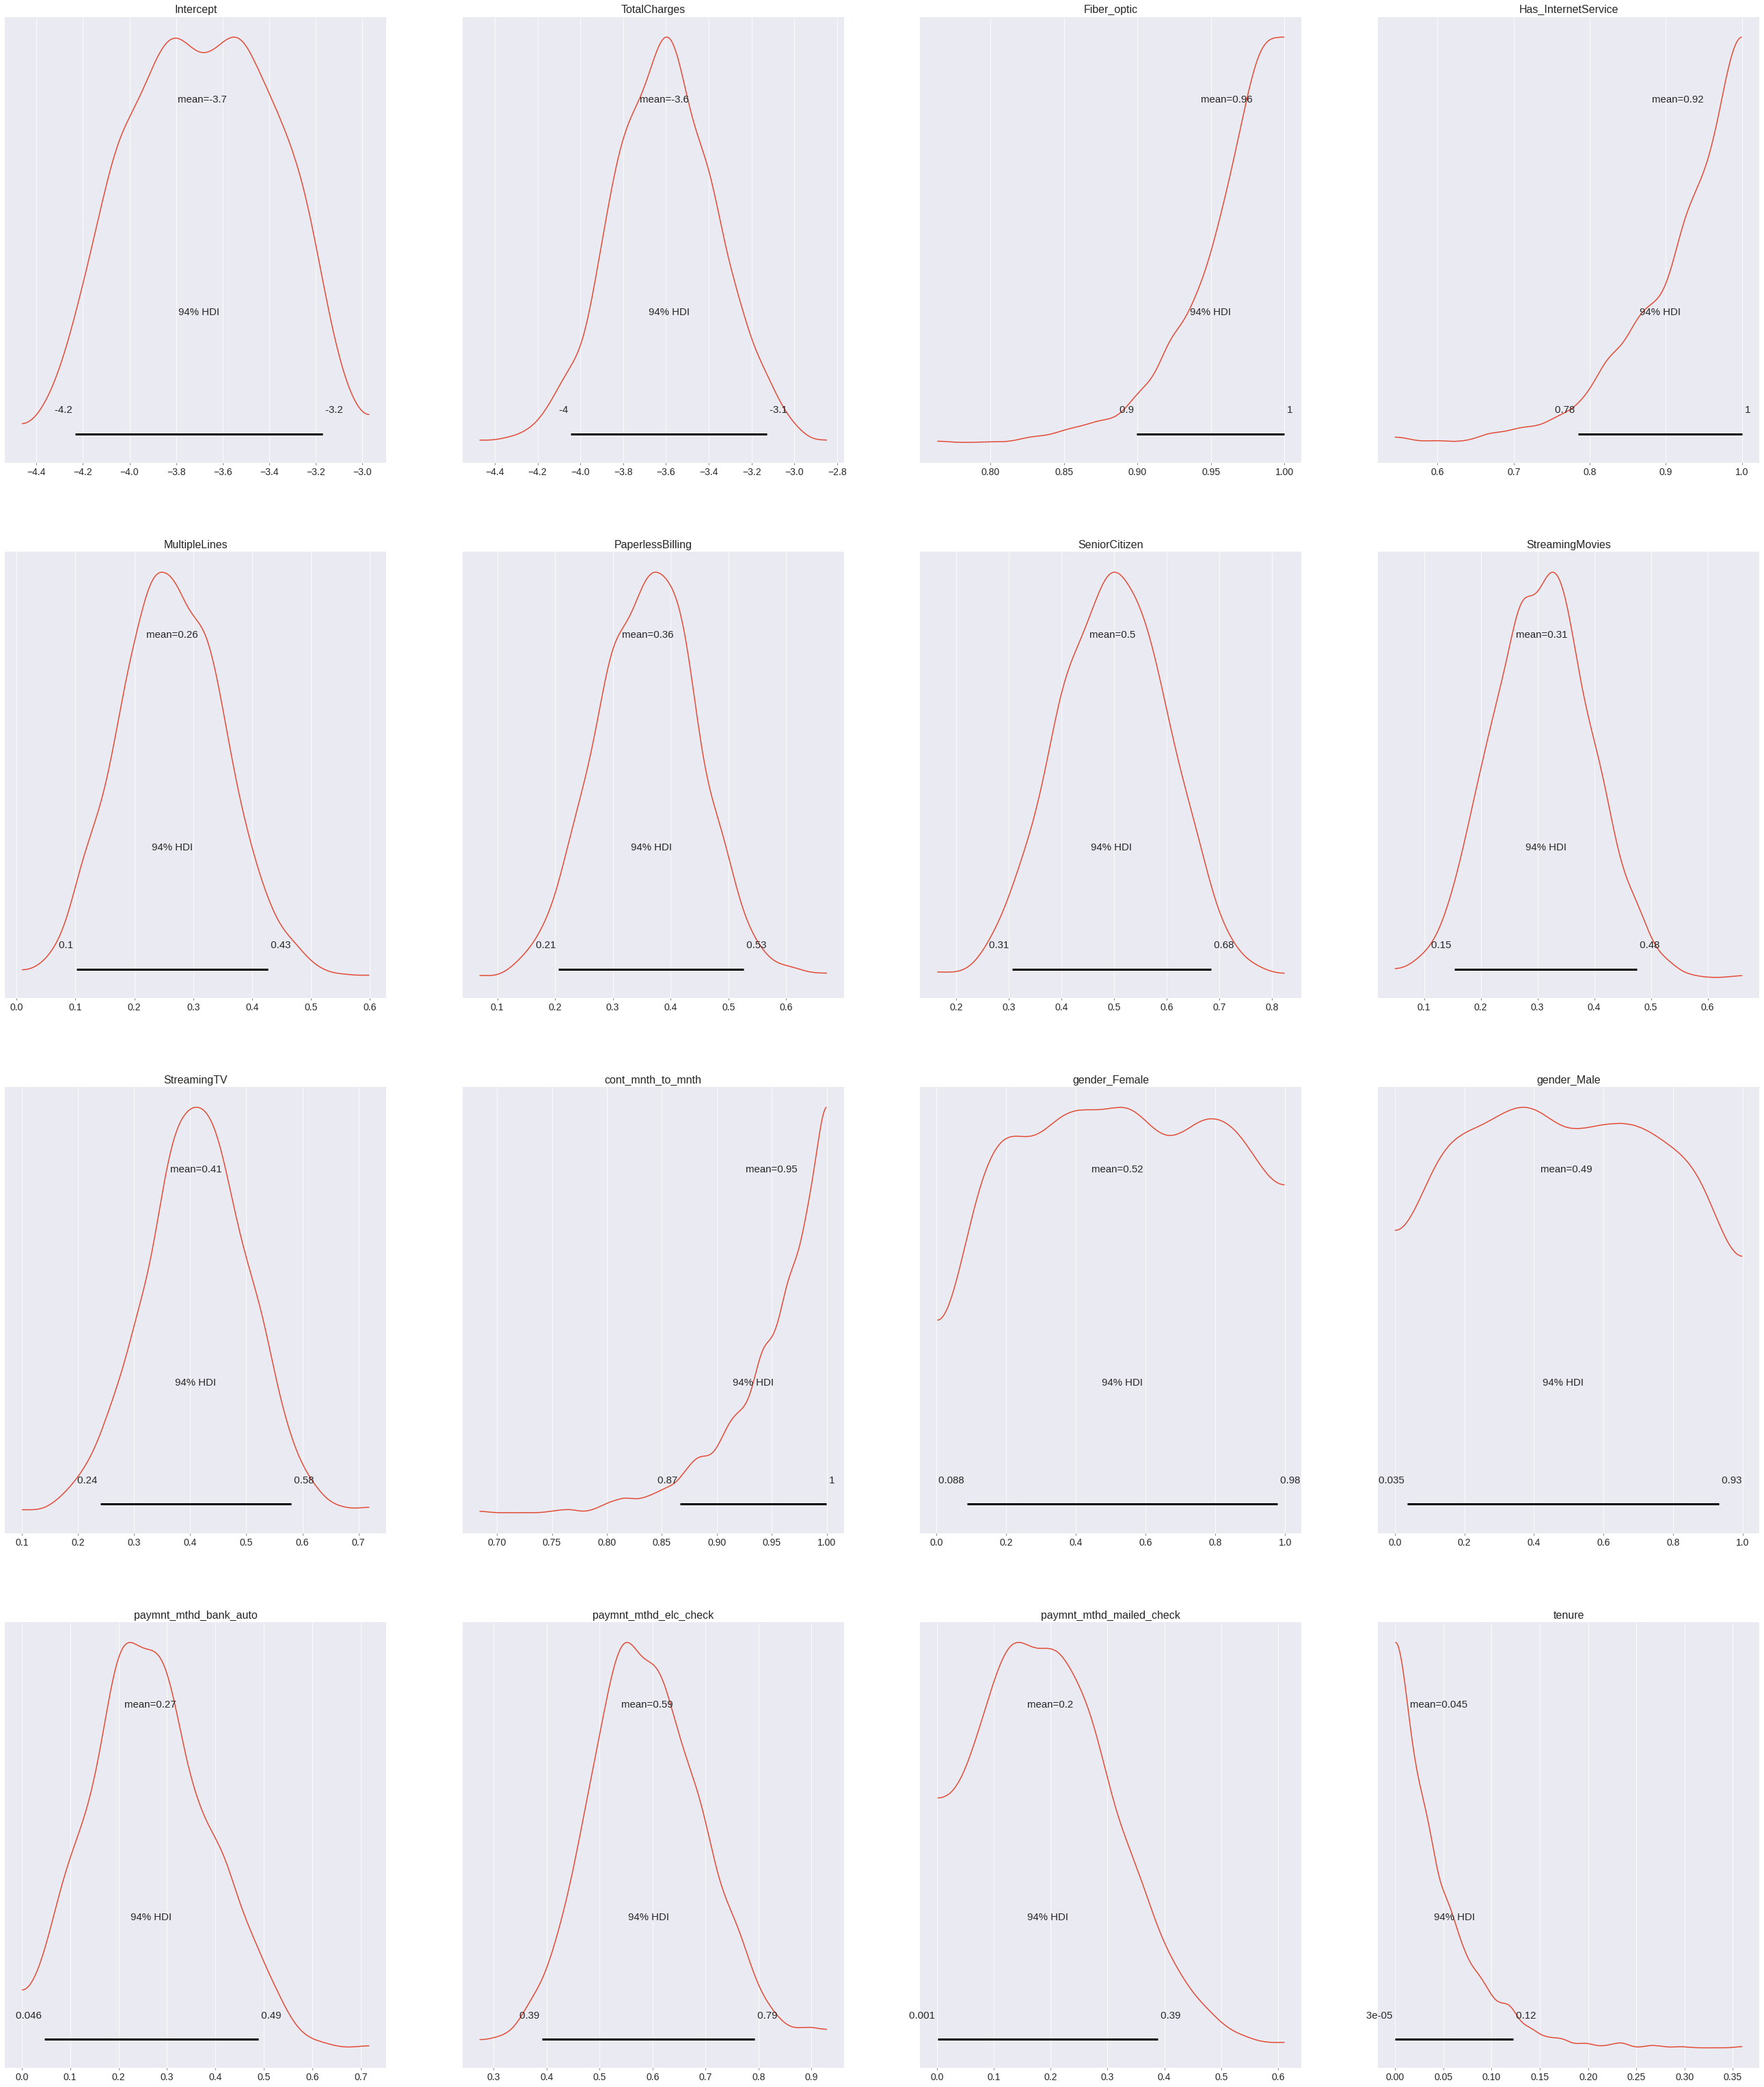

In [28]:
pm.plot_posterior(trace_log1);

In [29]:
pm.summary(trace_log1)

Got error No model on context stack. trying to find log_likelihood in translation.
arviz - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-3.687,0.304,-4.233,-3.171,0.012,0.008,690.0,1067.0,NaN
TotalCharges,-3.608,0.241,-4.045,-3.128,0.006,0.005,1435.0,1310.0,NaN
Fiber_optic,0.961,0.034,0.899,1.000,0.001,0.001,1672.0,904.0,NaN
Has_InternetService,0.916,0.074,0.784,1.000,0.002,0.001,1430.0,1048.0,NaN
MultipleLines,0.264,0.089,0.101,0.427,0.003,0.002,1183.0,828.0,NaN
PaperlessBilling,0.361,0.087,0.206,0.527,0.002,0.001,2229.0,1426.0,NaN
SeniorCitizen,0.496,0.103,0.305,0.684,0.002,0.001,2468.0,1257.0,NaN
StreamingMovies,0.307,0.087,0.153,0.476,0.002,0.001,1670.0,1234.0,NaN
StreamingTV,0.411,0.091,0.240,0.580,0.002,0.002,1507.0,949.0,NaN
cont_mnth_to_mnth,0.950,0.045,0.867,1.000,0.001,0.001,1477.0,825.0,NaN


In [30]:
fileObject = open("sign_parameters.pickle",'wb')  
pickle.dump(trace_log1, fileObject)
fileObject.close()

In [31]:
trace_log1_frm_file= pickle.load(open("sign_parameters.pickle",'rb')  )
#trace_log1=trace_log1_frm_file #Uncomment this line if we want to load the model from static file

In [32]:
means_dict_sign, std_dict_sign = evaluate_trace(trace_log1, X_test2, print_model=True)

Final Equation: 
logit = -3.6872 + 0.9606 * Fiber_optic + 0.9155 * Has_InternetService + 0.2643 * MultipleLines + 0.3607 * PaperlessBilling + 0.4960 * SeniorCitizen + 0.3074 * StreamingMovies + 0.4106 * StreamingTV + -3.6077 * TotalCharges + 0.9501 * cont_mnth_to_mnth + 0.5185 * gender_Female + 0.4933 * gender_Male + 0.2653 * paymnt_mthd_bank_auto + 0.5897 * paymnt_mthd_elc_check + 0.1989 * paymnt_mthd_mailed_check + 0.0452 * tenure


In [33]:
blr1_probs = find_probs(trace_log1, X_test2)

# Threshold the values at 0.5
predictions = (np.array(blr1_probs) > 0.5)
calc_metrics(predictions, y_test)

Accuracy of Model: 78.53%
F1 Score of Model: 0.5623


In [51]:
means_dict, std_dict = evaluate_trace(trace_log_MH, X_train, print_model=True)

Final Equation: 
logit = -2.2784 + 0.8472 * gender_Female + 0.8427 * gender_Male + 0.7700 * paymnt_mthd_bank_auto + 0.7480 * paymnt_mthd_cc_auto + 0.8227 * paymnt_mthd_elc_check + 0.7556 * paymnt_mthd_mailed_check + 0.6677 * cont_mnth_to_mnth + 0.5514 * cont_1_yr + 0.5797 * cont_2_yr + 0.0821 * SeniorCitizen + 0.0068 * Partner + 0.0045 * Dependents + 0.0129 * tenure + 0.1546 * PhoneService + 0.0820 * MultipleLines + 0.3309 * Has_InternetService + 0.4026 * Fiber_optic + 0.0263 * DSL + 0.0086 * OnlineSecurity + 0.0211 * OnlineBackup + 0.0402 * DeviceProtection + 0.0076 * TechSupport + 0.1401 * StreamingTV + 0.1206 * StreamingMovies + 0.0398 * PaperlessBilling + -0.7159 * MonthlyCharges + -0.6382 * TotalCharges


In [53]:
means_dict, std_dict = evaluate_trace(trace_log_NU_1, X_train, print_model=True)

Final Equation: 
logit = -4.0424 + 0.5191 * gender_Female + 0.4664 * gender_Male + 0.2326 * paymnt_mthd_bank_auto + 0.0810 * paymnt_mthd_cc_auto + 0.9238 * paymnt_mthd_elc_check + 0.4739 * paymnt_mthd_mailed_check + 0.9915 * cont_mnth_to_mnth + 0.0293 * cont_1_yr + 0.0116 * cont_2_yr + 0.4337 * SeniorCitizen + 0.0114 * Partner + 0.0168 * Dependents + 0.0070 * tenure + 0.2082 * PhoneService + 0.0382 * MultipleLines + 0.9607 * Has_InternetService + 0.9783 * Fiber_optic + 0.0397 * DSL + 0.0107 * OnlineSecurity + 0.0120 * OnlineBackup + 0.0208 * DeviceProtection + 0.0115 * TechSupport + 0.1841 * StreamingTV + 0.1121 * StreamingMovies + 0.4135 * PaperlessBilling + -1.4019 * MonthlyCharges + 0.0115 * TotalCharges


In [54]:
blr1_probs = find_probs(trace_log_NU_1, X_test2)

# Threshold the values at 0.5
predictions = (np.array(blr1_probs) > 0.5)
calc_metrics(predictions, y_test)

Accuracy of Model: 74.50%
F1 Score of Model: 0.5668


In [52]:
blr1_probs = find_probs(trace_log_MH, X_test2)

# Threshold the values at 0.5
predictions = (np.array(blr1_probs) > 0.5)
calc_metrics(predictions, y_test)

Accuracy of Model: 67.20%
F1 Score of Model: 0.5846


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


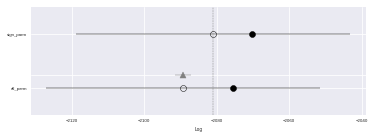

In [34]:
logistic_model.name='all_parm'
logistic_model1.name='sign_parm'
model_trace_dict = {'all_parm':trace_log,
                   'sign_parm':trace_log1}
dfwaic = pm.compare(model_trace_dict)
pm.compareplot(dfwaic);

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


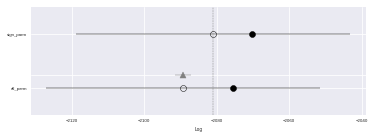

In [35]:
dfwaicloo = pm.compare(model_trace_dict, ic='LOO')
pm.compareplot(dfwaicloo);

In [36]:
print(dfwaic)
print(dfwaicloo)

           rank          loo      p_loo  ...       dse  warning  loo_scale
sign_parm     0 -2081.009864  10.874191  ...  0.000000    False        log
all_parm      1 -2089.263660  13.662868  ...  2.158255    False        log

[2 rows x 9 columns]
           rank          loo      p_loo  ...       dse  warning  loo_scale
sign_parm     0 -2081.009864  10.874191  ...  0.000000    False        log
all_parm      1 -2089.263660  13.662868  ...  2.158255    False        log

[2 rows x 9 columns]


In [15]:
def view_distribution(data):
    az.plot_kde(data, rug=True)
    return plt.yticks([0], alpha=0)

([<matplotlib.axis.YTick at 0x7f4d3ec241d0>],
 <a list of 1 Text major ticklabel objects>)

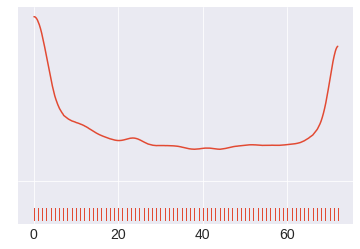

In [16]:
view_distribution(churn_data['tenure'])


([<matplotlib.axis.YTick at 0x7f4d3e47eb90>],
 <a list of 1 Text major ticklabel objects>)

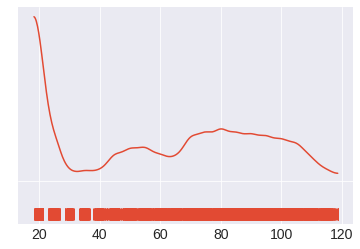

In [18]:
view_distribution(churn_data['MonthlyCharges'])

([<matplotlib.axis.YTick at 0x7f4d3e31de90>],
 <a list of 1 Text major ticklabel objects>)

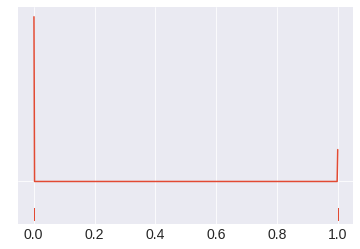

In [21]:
view_distribution(churn_data['SeniorCitizen'])

In [22]:
# columns to convert to date format
def change_type_to_date(data, to_date):
    # Deal with incorrect data in date column
    for i in to_date:
        data[i] = pd.to_datetime(data[i], errors='coerce')
    return data
    
    # columns to convert to numerical format
def change_type_to_numeric(data, to_numeric):
    # Deal with incorrect data in numeric columns
    for i in to_numeric:
        data[i] = pd.to_numeric(data[i], errors='coerce')
    return data
    
# columns to delete
def drop_useless_colums(data, cols_to_delete):
    # Drop useless columns before dealing with missing values
    for i in cols_to_delete:
        data = data.drop(i, axis=1)
    return data
    
#drop all rows which contain more than 40% missing values
def drop_useless_rows(data):
    min_threshold = math.ceil(len(data.columns)*0.4)
    data = data.dropna(thresh=min_threshold)
    return data
    
# drop rows in which columns specified by the driver program has missing values
def drop_na_rows(data, cols_to_drop_na_rows):
    for i in cols_to_drop_na_rows:
        data = data.drop(data[data[i].isnull()].index)
    return data
    
# Deal with missing values 
def fill_na_vals(data, fill_na_map):
    for col,val in fill_na_map.items():
        data[col].fillna(val, inplace=True)
    return data

In [23]:
#basic analysis
def basicanalysis(data):
    print("Shape is:\n", data.shape)
    print("\n Columns are:\n", data.columns)
    print("\n Types are:\n", data.dtypes)
    print("\n Statistical Analysis of Numerical Columns:\n", data.describe())

#string column analysis analysis
def stringcolanalysis(data):
    stringcols = data.select_dtypes(exclude=[np.number, "datetime64"])
    fig = plt.figure(figsize = (8,10))
    for i,col in enumerate(stringcols):
        fig.add_subplot(4,2,i+1)
        fig.savefig('Categorical.png')
        data[col].value_counts().plot(kind = 'bar', color='black' ,fontsize=10)
        plt.tight_layout()
        plt.title(col)

#numerical analysis
def numcolanalysis(data):
    numcols = data.select_dtypes(include=np.number)
    
    # Box plot for numerical columns
    for col in numcols:
        fig = plt.figure(figsize = (5,5))
        sb.boxplot(data[col], color='grey', linewidth=1)
        plt.tight_layout()
        plt.title(col)
        plt.savefig("Numerical.png")
    
    # Lets also plot histograms for these numerical columns
    data.hist(column=list(numcols.columns),bins=25, grid=False, figsize=(15,12),
                 color='#86bf91', zorder=2, rwidth=0.9)

# Perform correlation analysis over numerical columns
def correlation_anlysis(data):
    # NOTE: If label column is non-numeric, 'encode' it before calling this function 
    numcols = data.select_dtypes(include=np.number)
    corr = numcols.corr()
    ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
    )
    
    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')


# Apply label encoding on specified columns
def apply_label_encoding(data, cols=[]):
    le = preprocessing.LabelEncoder()
    for i in cols:
        le.fit(data[i])
        data[i] = le.transform(data[i])
    return data


# One-Hot/dummy encoding on specified columns
def onehotencoding(data):
    data = pd.get_dummies(data)
    return data

# One Hot encoding with Pandas categorical dtype
def onehotencoding_v2(data, cols=[]):
    for col in cols:
        data[col] = pd.Categorical(data[col])
        dfDummies = pd.get_dummies(data[col], prefix = col)
        data = pd.concat([data, dfDummies], axis=1)
        data = data.drop(col, axis=1)
    return data



## Defining the logistic function as this is a classification problem and I want to have all values between 0 and 1.

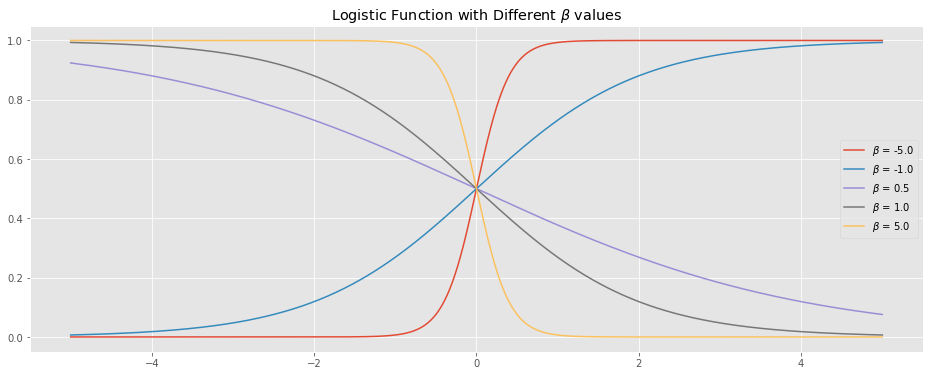

In [ ]:
# matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib

figsize(16, 6)

# Logistic function with only beta
def logistic(x, beta):
    return 1. / (1. + np.exp(beta * x))

# Plot examples with different betas 
x = np.linspace(-5, 5, 1000)
for beta in [-5, -1, 0.5, 1, 5]:
    plt.plot(x, logistic(x, beta), label = r"$\beta$ = %.1f" % beta)

plt.legend();
plt.title(r'Logistic Function with Different $\beta$ values');

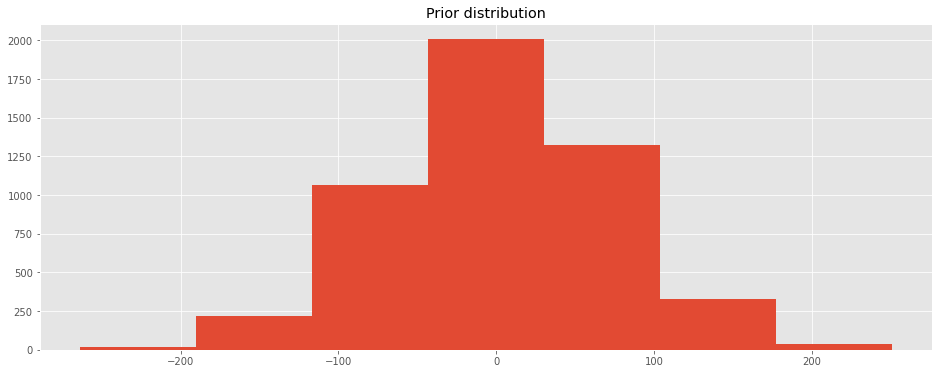

In [ ]:
σ_μ = 70
μ = σ_μ * np.random.randn(5000) # prior distribution
plt.hist(μ, 7)
plt.title('Prior distribution')
plt.show()

In [ ]:
data = churn_data['MonthlyCharges'].to_numpy()

In [ ]:
print ("Columns  : " ,data[1])
print ("\nFeatures : \n" ,data.tolist())
#print ("\nMissing values :  ", data.isnull().sum().values.sum())
#print ("\nUnique values :  \n",data.nunique())

Columns  :  -0.2608779199297493

Features : 
 [-1.1616939352451685, -0.2608779199297493, -0.3639232943754246, -0.747850415293989, 0.1961781764018748, 1.1584890119510036, 0.8078023344020117, -1.1650179795821258, 1.3296772953043026, -0.2874702746254075, -0.4935610235167579, -1.5240147679735103, 1.181757322309704, 1.2931128075977727, 1.3529456056630036, 1.6105590417771916, -1.4675060142452372, 1.3928341377064908, -0.3190486958265014, 0.8393807556031058, -0.8359375902233565, -1.495760391109374, -1.4841262359300234, -0.16281861198951, -0.1727907450003817, -0.3157246514895444, 1.1485168789401314, -1.150059780065818, 0.8460288442770204, -0.0032644838155611, 1.0487955488314131, 1.0205411719672768, 0.0449341590703193, -1.4824642137615447, -0.6497911073537496, 1.1667991227933967, 0.1629377330323022, 0.3324639942171226, 1.3811999825271402, 1.0986562138857725, -0.5068572008645872, 0.1463175113475158, -1.46418196990828, 0.5003282332334644, 0.3790006149345245, 0.6548962949019775, -0.5168293338754589

Increase target_accept: usually 0.9 is a good number (currently the default in PyMC3 is 0.8). This will help get rid of false positives from the test for divergences. However, divergences that don’t go away are cause for alarm.

Increasing tune can sometimes help as well: this gives the sampler more time to 1) find the typical set and 2) find good values for the step size, mass matrix elements, etc. If you’re running into divergences, it’s always possible that the sampler just hasn’t started the mixing phase and is still trying to find the typical set.

In [ ]:
## TRIED WITH NUTS AND Metropolis Hastings

n_samples = 1000 ## total samples to take from the distribution 
mu=0 ## assumed mean
sd_1=70 ## assumed sd for prior
sd_2=7 ## likelihood sd 
tune=1000 ## total tuning steps

with pm.Model() as model_g:
    μ = pm.Uniform('μ', lower=0, upper=70)
    σ = pm.HalfNormal('σ', sd=7)
    likelihood = pm.Normal('y', mu=μ, sd=σ, observed=data)
    step = pm.Metropolis()
    trace_g = pm.sample(500, tune=1000, step=step, discard_tuned_samples=False)
    

/Users/rabiyaowais/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:460: UserWarning: Tuning samples will be included in the returned `MultiTrace` object, which can lead to complications in your downstream analysis. Please consider to switch to `InferenceData`:
`pm.sample(..., return_inferencedata=True)`
  UserWarning,
/Users/rabiyaowais/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [σ]
>Metropolis: [μ]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 22 seconds.
The number of effective samples is smaller than 25% for some parameters.


As a drastic debugging measure, try to pm.sample with draws=1, tune=500, and discard_tuned_samples=False, and inspect the traceplot. During the tuning phase, we don’t expect to see friendly fuzzy caterpillars, but we do expect to see good (if noisy) exploration of parameter space. So if the sampler is getting stuck during the tuning phase, that might explain why the trace looks horrible.

In [49]:
ppc = pm.sample_posterior_predictive(trace_log, samples=1000, model=logistic_model)
np.asarray(ppc['y']).shape

(1000, 4922)

In [44]:
ppc_MH = pm.sample_posterior_predictive(trace_log_MH, samples=1000, model=logistic_model)
np.asarray(ppc_MH['y']).shape

(1000, 4922)

In [22]:
ppc_NU = pm.sample_posterior_predictive(trace_log_NU_1, samples=1000, model=logistic_model_1)
np.asarray(ppc_NU['y']).shape

(1000, 4922)

In [29]:
ppc_f = pm.sample_posterior_predictive(trace_log_F, samples=1000, model=logistic_modelF)
np.asarray(ppc_f['y']).shape

(1000, 4922)

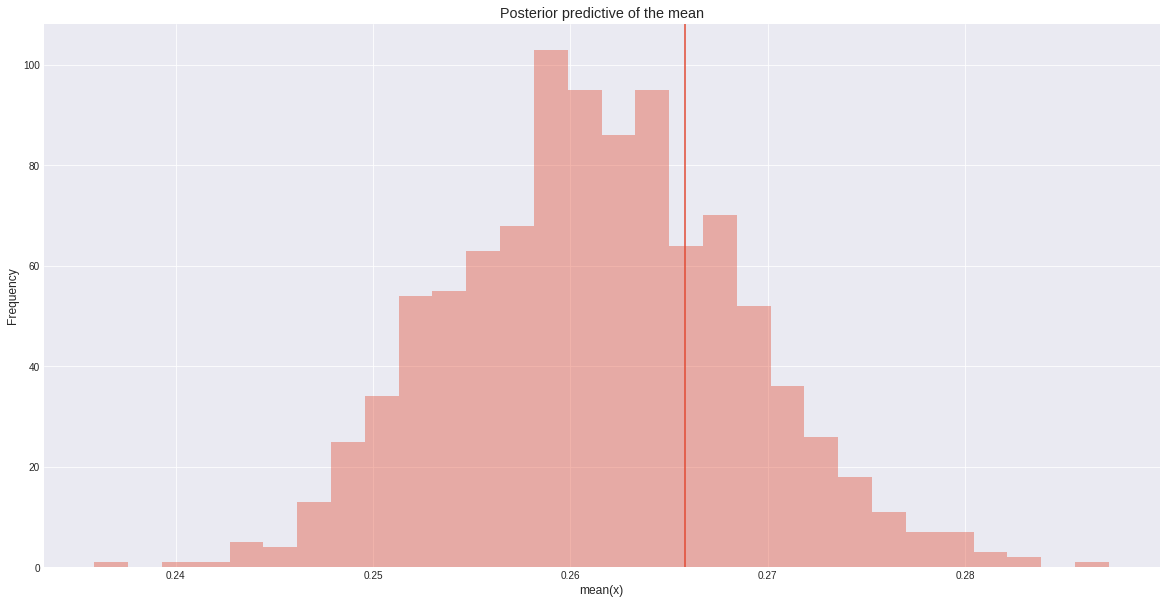

In [53]:
_, ax = plt.subplots(figsize=(20, 10))
ax.hist([y.mean() for y in ppc['y']], bins=30, alpha=0.4)
ax.axvline(y.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

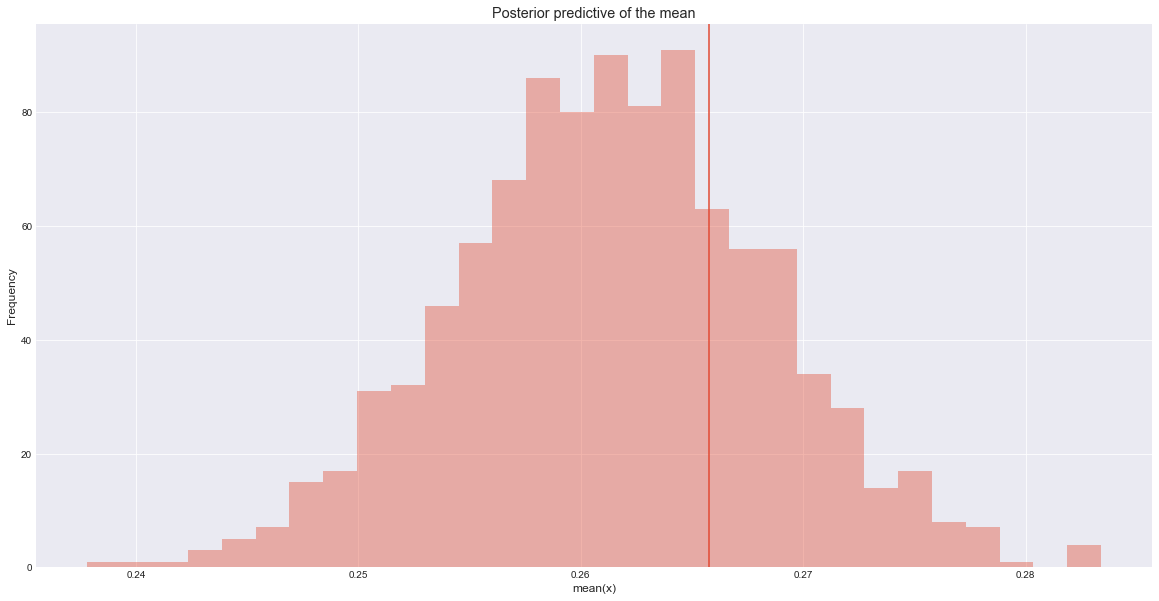

In [45]:
_, ax = plt.subplots(figsize=(20, 10))
ax.hist([y.mean() for y in ppc_MH['y']], bins=30, alpha=0.4)
ax.axvline(y.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

# The best result was obtained using Metropolis Hastings and using prior glm distribution of the normal family along with 3 data feature distributions.
# as you can see the data distribution and the posterior distribution line are relatively closer compared to other model variations showing accurate learning of the data distribution that can help generalize this model for learning purposes.

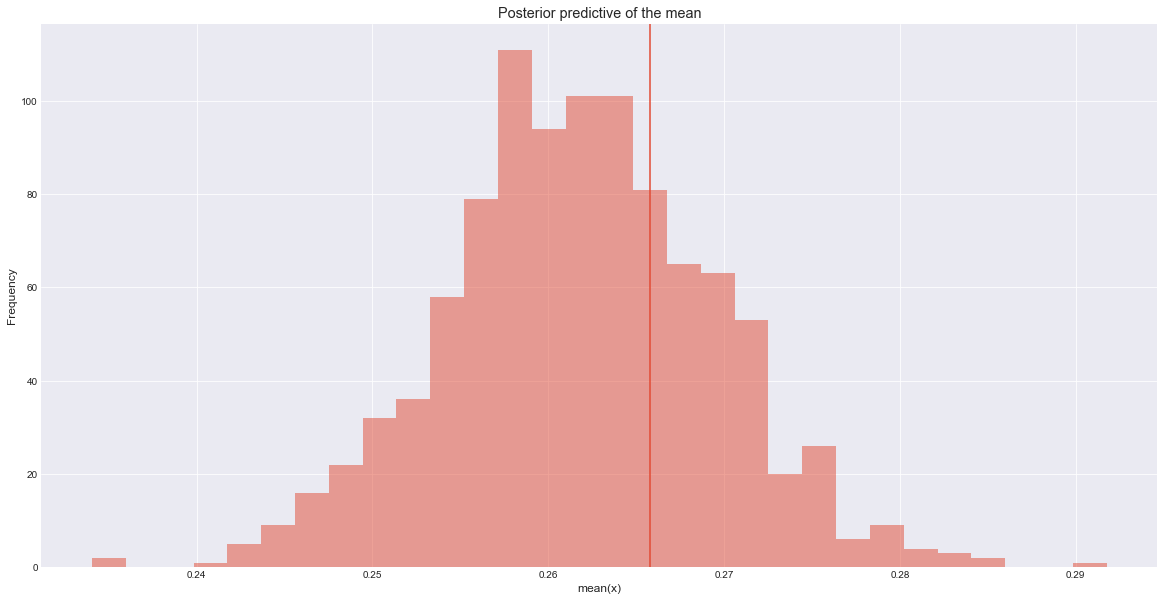

In [26]:
_, ax = plt.subplots(figsize=(20, 10))
ax.hist([y.mean() for y in ppc_NU['y']], bins=30, alpha=0.5)
ax.axvline(y.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

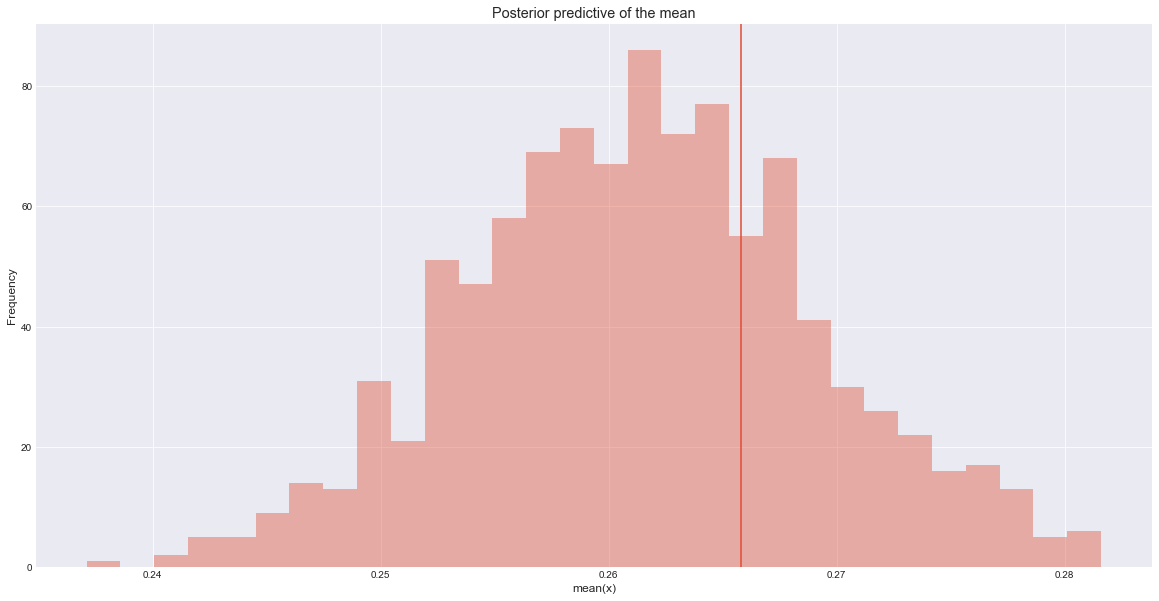

In [30]:
_, ax = plt.subplots(figsize=(20, 10))
ax.hist([y.mean() for y in ppc_f['y']], bins=30, alpha=0.4)
ax.axvline(y.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');